In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

**Q1**

Consider the following data with x as the predictor and y as as the outcome.

```
x = [0.61, 0.93, 0.83, 0.35, 0.54, 0.16, 0.91, 0.62, 0.62]
y = [0.67, 0.84, 0.6, 0.18, 0.85, 0.47, 1.1, 0.65, 0.36]
```

Give a P-value for the two sided hypothesis test of whether β1 from a linear regression model is 0 or not.

* __0.05296__
* 0.391
* 0.025
* 2.325

slope=0.7224210798688978, intercept=0.18845717612558216


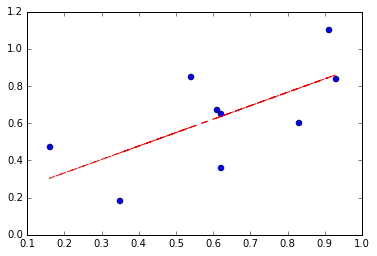

In [2]:
x = np.array([0.61, 0.93, 0.83, 0.35, 0.54, 0.16, 0.91, 0.62, 0.62])
y = np.array([0.67, 0.84, 0.6, 0.18, 0.85, 0.47, 1.1, 0.65, 0.36])
n = len(x)
mu_x = np.mean(x)
mu_y = np.mean(y)

beta1 = np.dot(x - mu_x, y - mu_y) / sum((x - mu_x) ** 2)
beta0 = mu_y - beta1 * mu_x
print("slope={}, intercept={}".format(beta1, beta0))

yhat = (lambda x: beta0 + beta1 * x)(x)

plt.plot(x, y, 'bo', x, yhat, '--r')

In [3]:
print("Slope inference\n{}".format("-" * 50))
print("Estimate: {}".format(beta1))
resid = y - yhat
sigma = np.sqrt(sum(resid ** 2) / (n - 2))  # residual standard error
print("Residual std. error: {}".format(sigma))
se_beta1 = sigma / np.sqrt(sum((x - mu_x) ** 2))  # standard error of the slope
print("Std. Error: {}".format(se_beta1))
t_beta1 = beta1 / se_beta1  # t-statistic beta1 - beta_theta / se_beta1, where beta_theta = 0 in our case
print("t value: {}".format(t_beta1))
p_beta1 = 2 * stats.t.sf(np.abs(t_beta1), n - 2)  # equivalent of R 2 * pt(abs(t_beta1), n - 2, lower.tail = FALSE)
print("Pr(>|t|): {}".format(p_beta1))

Slope inference
--------------------------------------------------
Estimate: 0.7224210798688978
Residual std. error: 0.2229980659078784
Std. Error: 0.3106531111754473
t value: 2.325491211516941
Pr(>|t|): 0.05296438730856383


Q2
--

Consider the previous problem, give the estimate of the residual standard deviation.

* 0.4358
* 0.05296
* 0.3552
* __0.223__

Q3
--

In the 𝚖𝚝𝚌𝚊𝚛𝚜 data set, fit a linear regression model of weight (predictor) on mpg (outcome). Get a 95% confidence interval for the expected mpg at the average weight. What is the lower endpoint?

* -6.486
* -4.00
* __18.991__
* 21.190

slope = -5.344471572722677, intercept = 37.28512616734203


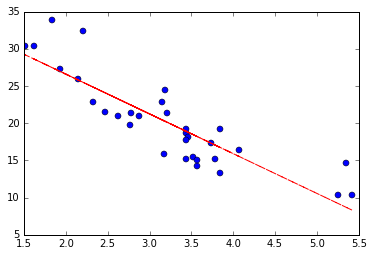

In [4]:
from ggplot import mtcars

x = mtcars.wt
y = mtcars.mpg
n = len(x)
mu_x = np.mean(x)
mu_y = np.mean(y)

ssx = sum((x - mu_x) ** 2)
beta1 = np.dot(x - mu_x, y - mu_y) / ssx
beta0 = mu_y - beta1 * mu_x
print("slope = {}, intercept = {}".format(beta1, beta0))

yhat = (lambda x: beta1 * x + beta0)(x)
plt.plot(x, y, 'bo', x, yhat, '--r')

In [5]:
resid = y - yhat
sigma = np.sqrt(sum(resid ** 2) / (n - 2))  # residual standard error

# Std. error of the fitted line at x0 = mu_x
se = sigma * np.sqrt(1 / n)

# 95% confidence interval of the expected mpg at mu_x
(beta0 + beta1 * mu_x) + np.array([-1, 1]) * stats.t.ppf(.975, n - 2) * se

array([ 18.99098182,  21.19026818])

Q4
--

Refer to the previous question. Read the help file for 𝚖𝚝𝚌𝚊𝚛𝚜. What is the weight coefficient interpreted as?

* It can't be interpreted without further information
* The estimated 1,000 lb change in weight per 1 mpg increase.
* __The estimated expected change in mpg per 1,000 lb increase in weight.__
* The estimated expected change in mpg per 1 lb increase in weight.

Q5
--

Consider again the 𝚖𝚝𝚌𝚊𝚛𝚜 data set and a linear regression model with mpg as predicted by weight (1,000 lbs). A new car is coming weighing 3000 pounds. Construct a 95% prediction interval for its mpg. What is the upper endpoint?

* -5.77
* __27.57__
* 14.93
* 21.25

In [6]:
x0 = 3  # 3000 lbs

# Std. error of the prediction interval at x0
se_predict = sigma * np.sqrt(1 + 1 / n + (x0 - mu_x) ** 2 / ssx)

# 95% prediction interval of the expected mpg at x0
(beta0 + beta1 * x0) + np.array([-1, 1]) * stats.t.ppf(.975, n - 2) * se_predict

array([ 14.92987355,  27.57354935])

Q6
--

Consider again the 𝚖𝚝𝚌𝚊𝚛𝚜 data set and a linear regression model with mpg as predicted by weight (in 1,000 lbs). A “short” ton is defined as 2,000 lbs. Construct a 95% confidence interval for the expected change in mpg per 1 short ton increase in weight. Give the lower endpoint.

* -9.000
* 4.2026
* -6.486
* __-12.973__

In [7]:
se_beta1 = sigma / np.sqrt(ssx)
(beta1 + np.array([-1, 1]) * stats.t.ppf(.975, n - 2) * se_beta1) * 2

array([-12.97261647,  -8.40526982])

Q7
--

If my `X` from a linear regression is measured in centimeters and I convert it to meters what would happen to the slope coefficient?

* It would get divided by 10
* It would get multiplied by 10
* __It would get multiplied by 100__
* It would get divided by 100

Q8
--

I have an outcome, `Y`, and a predictor, `X` and fit a linear regression model with `Y=β0+β1X+ϵ` to obtain `β^0` and `β^1`. What would be the consequence to the subsequent slope and intercept if I were to refit the model with a new regressor, `X+c` for some constant, `c`?

* __The new intercept would be `β^0+cβ^1`__
* The new slope would be `β^1+c`
* The new intercept would be `β^0−cβ^1`
* The new slope would be `cβ^1`

Q9
--

Refer back to the `mtcars` data set with `mpg` as an outcome and weight (`wt`) as the predictor. About what is the ratio of the the sum of the squared errors, `∑ni=1(Yi−Y^i)2` when comparing a model with just an intercept (denominator) to the model with the intercept and slope (numerator)?

* __0.25__
* 0.50
* 4.00
* 0.75

In [8]:
x = mtcars.wt
y = mtcars.mpg
n = len(x)
mu_x = np.mean(x)
mu_y = np.mean(y)

# Model 1: just the intercept (ie. beta1 = 0)
model_1_beta0 = mu_y
model_1_yhat = (lambda x: model_1_beta0)(x)
model_1_e = sum((y - model_1_yhat) ** 2)

# Model 2: intercept and slope
model_2_ssx = sum((x - mu_x) ** 2)
model_2_beta1 = np.dot(x - mu_x, y - mu_y) / ssx
model_2_beta0 = mu_y - model_2_beta1 * mu_x
model_2_yhat = (lambda x: model_2_beta0 + model_2_beta1 * x)(x)
model_2_e = sum((y - model_2_yhat) ** 2)

model_2_e / model_1_e

0.24716720634173525

Q10
---

Do the residuals always have to sum to 0 in linear regression?

* The residuals must always sum to zero.
* The residuals never sum to zero.
* __If an intercept is included, then they will sum to 0__.
* If an intercept is included, the residuals most likely won't sum to zero.